In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('gold_futures(in).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,1/2/2020,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,1/3/2020,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,1/6/2020,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,1/7/2020,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,1/8/2020,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down


# **Preprossing**

In [3]:
min_value = data['High'].min()
max_value = data['High'].max()

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")


Minimum Value: 1484.0
Maximum Value: 2789.0


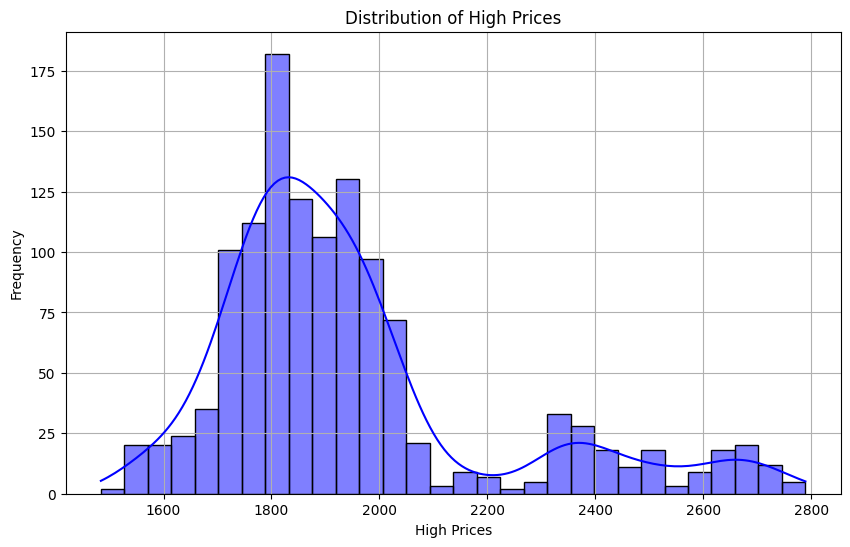

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['High'], bins=30, kde=True, color='blue')
plt.title('Distribution of High Prices')
plt.xlabel('High Prices')
plt.ylabel('Frequency')
plt.grid()
plt.show()


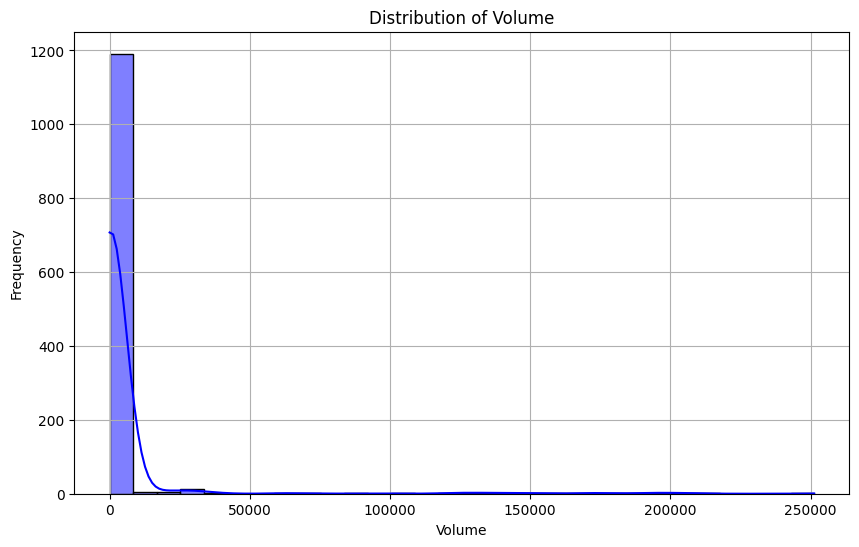

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid()
plt.show()


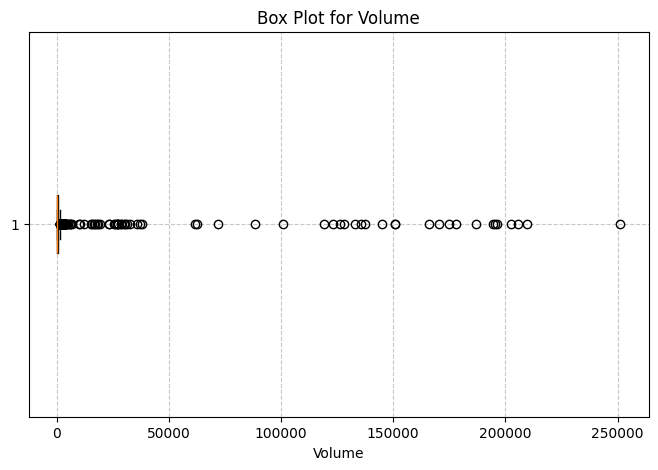

In [6]:
plt.figure(figsize=(8, 5))
plt.boxplot(data["Volume"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for Volume")
plt.xlabel("Volume")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [ ]:


Q1 = data["Volume"].quantile(0.25)
Q3 = data["Volume"].quantile(0.75)

IQR = Q3 - Q1

filtered_df = data[(data["Volume"] >= Q1 - 1.5 * IQR) & (data["Volume"] <= Q3 + 1.5 * IQR)]

min_value = filtered_df["Volume"].min()
median_value = filtered_df["Volume"].median()
max_value = filtered_df["Volume"].max()

print(f"Minimum value (without outliers): {min_value}")
print(f"Median value (without outliers): {median_value}")
print(f"Maximum value (without outliers): {max_value}")


Minimum value (without outliers): 0
Median value (without outliers): 191.0
Maximum value (without outliers): 1500


In [13]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 22.9 MB/s eta 0:00:00


# **Membership Functions**

## **Triangular Membership**

In [ ]:
import pandas as pd

relevant_columns = ['High']

quartiles = {}

for column in relevant_columns:
    q1 = data[column].quantile(0.25)
    q2 = data[column].quantile(0.50)
    q3 = data[column].quantile(0.75)
    quartiles[column] = {"Q1": q1, "Median (Q2)": q2, "Q3": q3}

quartiles_df = pd.DataFrame(quartiles).T
quartiles_df.columns = ["Q1", "Median (Q2)", "Q3"]

print("Quartiles for Relevant Columns:")
print(quartiles_df)

min_value = data['High'].min()
max_value = data['High'].max()

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")



Quartiles for Relevant Columns:
               Q1  Median (Q2)           Q3
High  1787.800049       1876.0  1994.599976
Minimum Value: 1484.0
Maximum Value: 2789.0


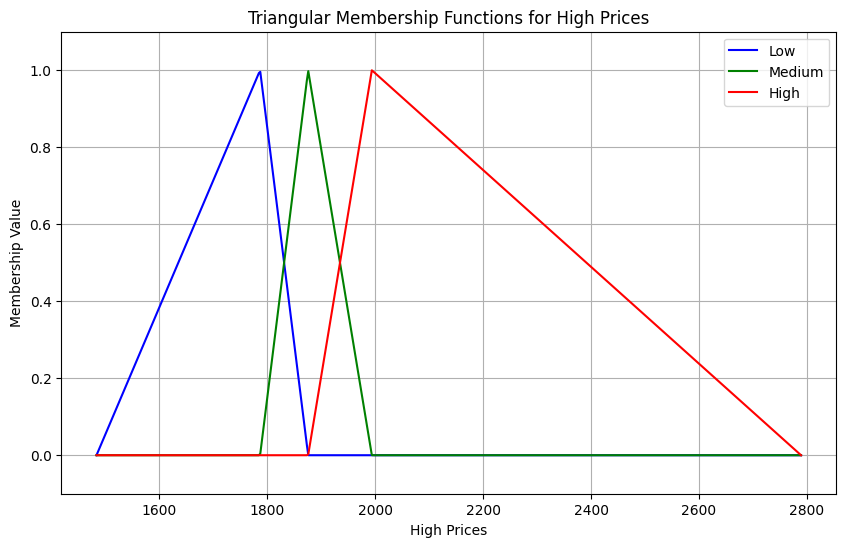

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_membership(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

x = np.linspace(1484, 2789, 500)

# Define membership functions for High price
low = triangular_membership(x, 1484, 1787, 1876)
medium = triangular_membership(x, 1787, 1876, 1994)
high = triangular_membership(x, 1876, 1994, 2789.0)

plt.figure(figsize=(10, 6))
plt.plot(x, low, label="Low", color="blue")
plt.plot(x, medium, label="Medium", color="green")
plt.plot(x, high, label="High", color="red")

plt.title("Triangular Membership Functions for High Prices")
plt.xlabel("High Prices")
plt.ylabel("Membership Value")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)


plt.show()


## **Gaussian Membership**

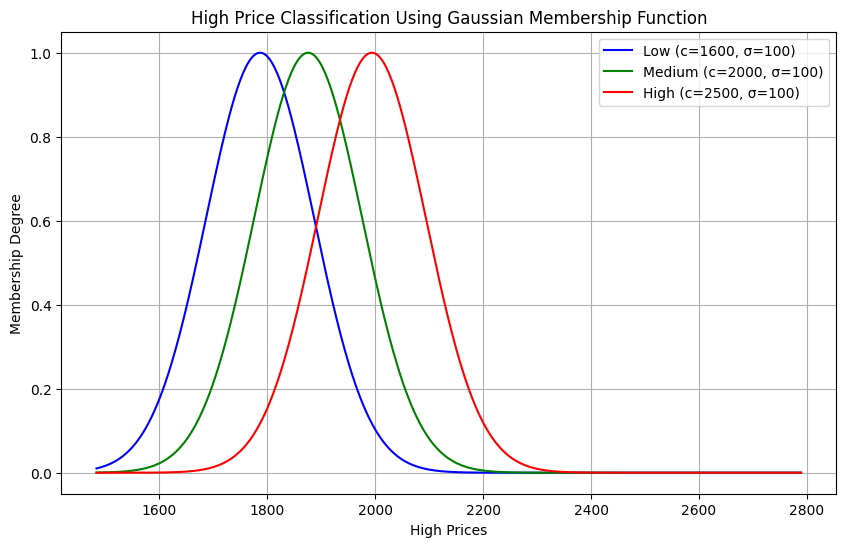

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian membership function
def gaussian_membership(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))

# High price range
x = np.linspace(1484, 2789, 500)

low = gaussian_membership(x, 1787, 100)      
medium = gaussian_membership(x, 1876, 100)  
high = gaussian_membership(x, 1994, 100)    

plt.figure(figsize=(10, 6))
plt.plot(x, low, label="Low (c=1600, σ=100)", color="blue")
plt.plot(x, medium, label="Medium (c=2000, σ=100)", color="green")
plt.plot(x, high, label="High (c=2500, σ=100)", color="red")

plt.title("High Price Classification Using Gaussian Membership Function")
plt.xlabel("High Prices")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


## **Comparison**

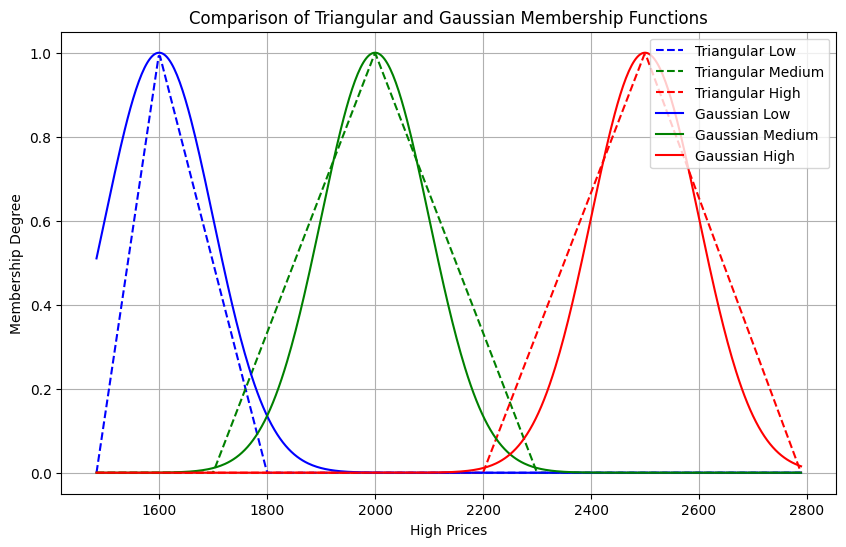

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Triangular Membership Functions
plt.plot(x, triangular_membership(x, 1484, 1600, 1800), label="Triangular Low", linestyle="--", color="blue")
plt.plot(x, triangular_membership(x, 1700, 2000, 2300), label="Triangular Medium", linestyle="--", color="green")
plt.plot(x, triangular_membership(x, 2200, 2500, 2789), label="Triangular High", linestyle="--", color="red")

# Plot Gaussian Membership Functions
plt.plot(x, gaussian_membership(x, 1600, 100), label="Gaussian Low", color="blue")
plt.plot(x, gaussian_membership(x, 2000, 100), label="Gaussian Medium", color="green")
plt.plot(x, gaussian_membership(x, 2500, 100), label="Gaussian High", color="red")

plt.title("Comparison of Triangular and Gaussian Membership Functions")
plt.xlabel("High Prices")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


# **C-Fuzzy Means**

m=1.5: FPC=0.9175, Silhouette Score=0.5425
m=2.0: FPC=0.8021, Silhouette Score=0.5430
m=2.5: FPC=0.6908, Silhouette Score=0.5433


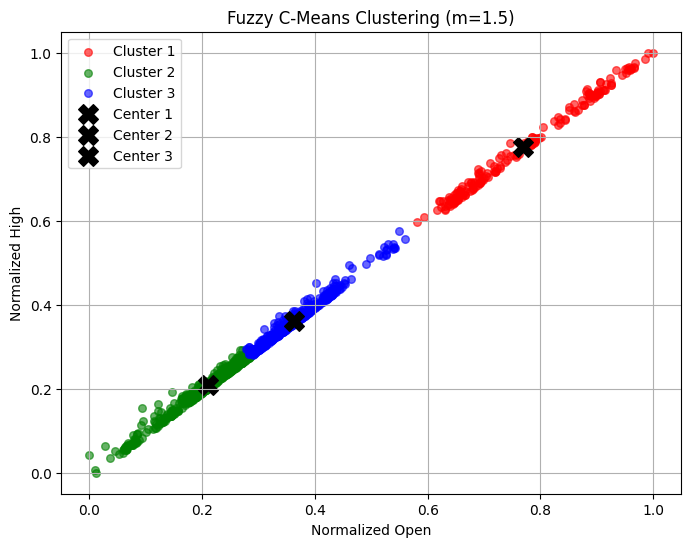

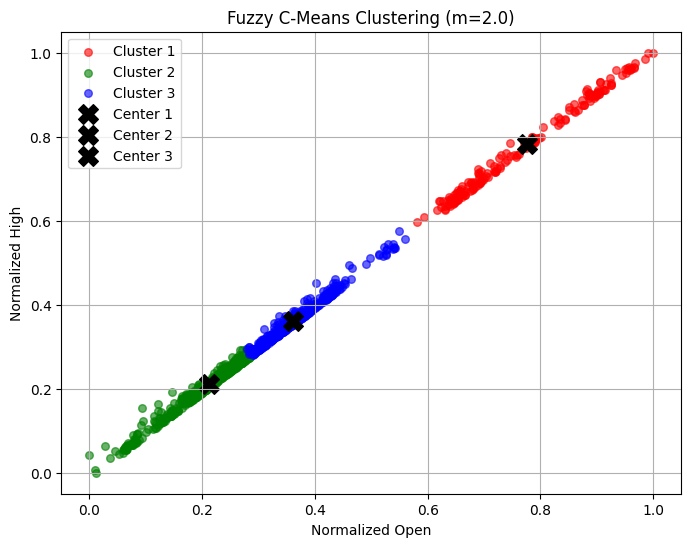

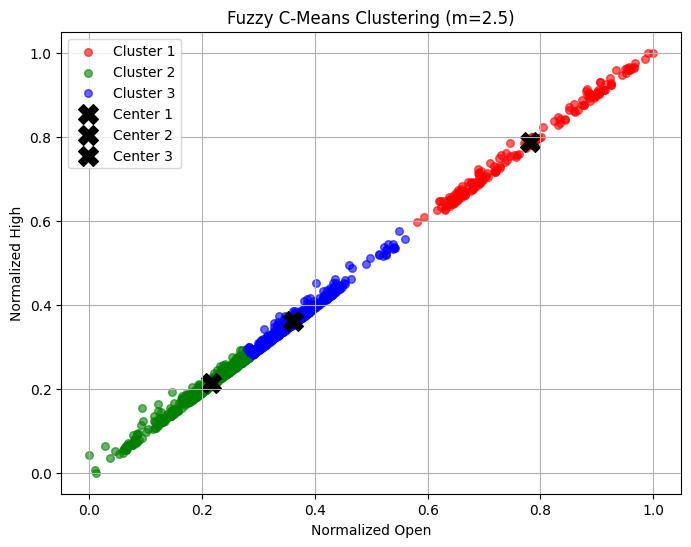


Comparison of FPC and Silhouette Scores:
   Fuzziness (m)       FPC  Silhouette Score
0            1.5  0.917548          0.542539
1            2.0  0.802124          0.542995
2            2.5  0.690788          0.543327

Cluster Centers Table:
       Open      High       Low     Close    Volume  Fuzziness
0  0.769187  0.775254  0.770485  0.767661  0.014015        1.5
1  0.210223  0.208299  0.215565  0.205414  0.012989        1.5
2  0.362053  0.361655  0.367004  0.357846  0.013320        1.5
3  0.775875  0.782003  0.777164  0.774406  0.011559        2.0
4  0.212052  0.210090  0.217393  0.207193  0.009991        2.0
5  0.361596  0.361193  0.366503  0.357390  0.009979        2.0
6  0.781002  0.787095  0.782377  0.779612  0.010023        2.5
7  0.215170  0.213113  0.220574  0.210263  0.008161        2.5
8  0.360569  0.360121  0.365524  0.356411  0.008040        2.5


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

features = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

data_transposed = normalized_features.T

fuzziness_values = [1.5, 2.0, 2.5]  
n_clusters = 3  

results = {}
fpc_scores = []
silhouette_scores = []
cluster_centers_data = []  

for m in fuzziness_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_transposed,
        c=n_clusters,
        m=m,
        error=1e-5,
        maxiter=1000,
        seed=42
    )

    cluster_labels = np.argmax(u, axis=0)
    results[m] = {
        'centers': cntr,
        'membership_matrix': u,
        'cluster_labels': cluster_labels
    }

    cluster_centers_data.append(pd.DataFrame(cntr, columns=features.columns).assign(Fuzziness=m))

    fpc_scores.append(fpc)
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"m={m}: FPC={fpc:.4f}, Silhouette Score={silhouette_avg:.4f}")

cluster_centers_table = pd.concat(cluster_centers_data, ignore_index=True)

colors = ['r', 'g', 'b']

for m, result in results.items():
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        plt.scatter(normalized_features[result['cluster_labels'] == i, 0],  
                    normalized_features[result['cluster_labels'] == i, 1],  
                    s=30, alpha=0.6, label=f'Cluster {i + 1}', color=colors[i])

    for i, center in enumerate(result['centers']):
        plt.scatter(center[0], center[1], s=200, c='black', marker='X', edgecolors='k', label=f'Center {i + 1}')

    plt.title(f'Fuzzy C-Means Clustering (m={m})')
    plt.xlabel('Normalized Open')
    plt.ylabel('Normalized High')
    plt.legend()
    plt.grid(True)
    plt.show()

comparison_df = pd.DataFrame({
    'Fuzziness (m)': fuzziness_values,
    'FPC': fpc_scores,
    'Silhouette Score': silhouette_scores
})

print("\nComparison of FPC and Silhouette Scores:")
print(comparison_df)

print("\nCluster Centers Table:")
print(cluster_centers_table)


# **Fuzzy Inference System (FIS)**

## **Defining Ranges**

In [7]:
import pandas as pd

relevant_columns = ['Volume']

quartiles = {}

for column in relevant_columns:
    q1 = data[column].quantile(0.25)
    q2 = data[column].quantile(0.50)
    q3 = data[column].quantile(0.75)
    quartiles[column] = {"Q1": q1, "Median (Q2)": q2, "Q3": q3}

quartiles_df = pd.DataFrame(quartiles).T
quartiles_df.columns = ["Q1", "Median (Q2)", "Q3"]

print("Quartiles for Relevant Columns:")
print(quartiles_df)



Quartiles for Relevant Columns:
          Q1  Median (Q2)     Q3
Volume  74.0        231.0  645.0


In [8]:
min_value = data['Volume'].min()
max_value = data['Volume'].max()

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")


Minimum Value: 0
Maximum Value: 251274


In [9]:
import pandas as pd



data['Price Difference'] = data['Close'].diff().fillna(0)

data['Price Movement Detail'] = data['Price Difference'].apply(
    lambda x: abs(x) if x > 0 else -abs(x) if x < 0 else 0
)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement,Price Difference,Price Movement Detail
0,1/2/2020,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up,0.000000,0.000000
1,1/3/2020,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up,24.699951,24.699951
2,1/6/2020,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up,17.000000,17.000000
3,1/7/2020,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up,5.600098,5.600098
4,1/8/2020,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down,-14.400025,-14.400025


In [10]:
min_value = data['Price Movement Detail'].min()
max_value = data['Price Movement Detail'].max()

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")


Minimum Value: -97.10009799999989
Maximum Value: 93.19995100000006


In [11]:
negative_range = data[data['Price Movement Detail'] <= 0]
negative_quartiles = negative_range['Price Movement Detail'].quantile([0.25, 0.5, 0.75])

positive_range = data[data['Price Movement Detail'] >= 0]
positive_quartiles = positive_range['Price Movement Detail'].quantile([0.25, 0.5, 0.75])

print("Negative Range Quartiles (Min to 0):")
print(negative_quartiles)

print("\nPositive Range Quartiles (0 to Max):")
print(positive_quartiles)


Negative Range Quartiles (Min to 0):
0.25   -20.650024
0.50    -9.799927
0.75    -4.450012
Name: Price Movement Detail, dtype: float64

Positive Range Quartiles (0 to Max):
0.25     5.049988
0.50    10.599853
0.75    20.000000
Name: Price Movement Detail, dtype: float64


## **Fuzzy**

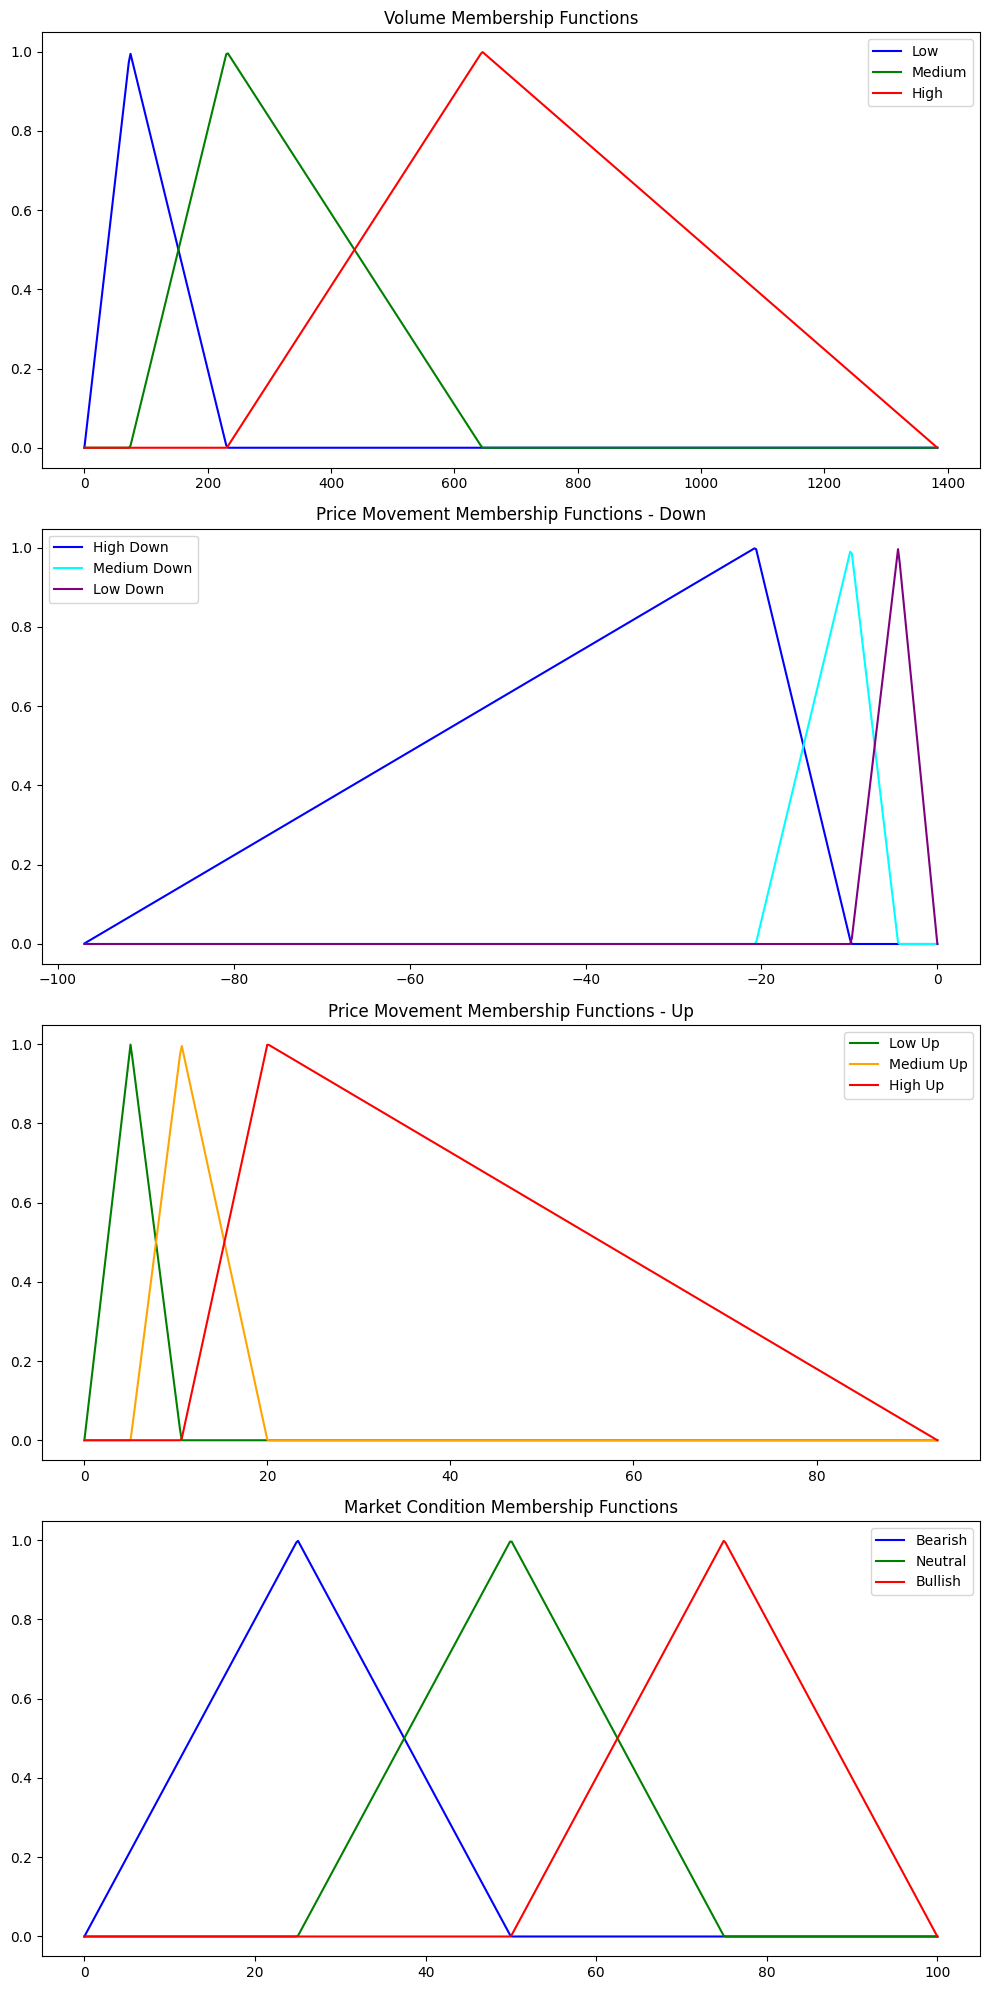

Sample Volume: 645
Sample Price Movement: Down
Volume Levels: Low=0.00, Medium=0.00, High=1.00
Price Movement Levels (Down): High=0.00, Medium=0.10, Low=0.90
Price Movement Levels (Up): High=0.00, Medium=0.00, Low=0.00
Market Condition Levels: Bearish=0.00, Neutral=0.00, Bullish=1.00
Defuzzified Market Condition: 74.95


In [39]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

volume = np.linspace(0, 1383, 500)
price_movement_down = np.linspace(-97, 0, 500)  
price_movement_up = np.linspace(0, 93.2, 500)     
market_condition = np.linspace(0, 100, 500)

# Membership functions for Volume
volume_low = fuzz.trimf(volume, [0, 74, 231])
volume_medium = fuzz.trimf(volume, [74, 231, 645])
volume_high = fuzz.trimf(volume, [231, 645, 1383])

# Membership functions for Price Movement - Negative Range
High_movement_down = fuzz.trimf(price_movement_down, [-97.1, -20.650024, -9.799927])
Medium_movement_down = fuzz.trimf(price_movement_down, [-20.650024, -9.799927, -4.450012])
Low_movement_down = fuzz.trimf(price_movement_down, [-9.799927, -4.450012, 0])

# Membership functions for Price Movement - Positive Range
Low_movement_Up = fuzz.trimf(price_movement_up, [0, 5.05, 10.6])
Medium_movement_Up = fuzz.trimf(price_movement_up, [5.05, 10.6, 20.0])
High_movement_Up = fuzz.trimf(price_movement_up, [10.6, 20.0, 93.2])

# Membership functions for Market Condition
condition_bearish = fuzz.trimf(market_condition, [0, 25, 50])
condition_neutral = fuzz.trimf(market_condition, [25, 50, 75])
condition_bullish = fuzz.trimf(market_condition, [50, 75, 100])

# Plot Membership Functions
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Volume Membership Functions
axs[0].plot(volume, volume_low, label="Low", color="blue")
axs[0].plot(volume, volume_medium, label="Medium", color="green")
axs[0].plot(volume, volume_high, label="High", color="red")
axs[0].set_title("Volume Membership Functions")
axs[0].legend()

# Price Movement Membership Functions - Negative Range
axs[1].plot(price_movement_down, High_movement_down, label="High Down", color="blue")
axs[1].plot(price_movement_down, Medium_movement_down, label="Medium Down", color="cyan")
axs[1].plot(price_movement_down, Low_movement_down, label="Low Down", color="purple")
axs[1].set_title("Price Movement Membership Functions - Down")
axs[1].legend()

# Price Movement Membership Functions - Positive Range
axs[2].plot(price_movement_up, Low_movement_Up, label="Low Up", color="green")
axs[2].plot(price_movement_up, Medium_movement_Up, label="Medium Up", color="orange")
axs[2].plot(price_movement_up, High_movement_Up, label="High Up", color="red")
axs[2].set_title("Price Movement Membership Functions - Up")
axs[2].legend()

# Market Condition Membership Functions
axs[3].plot(market_condition, condition_bearish, label="Bearish", color="blue")
axs[3].plot(market_condition, condition_neutral, label="Neutral", color="green")
axs[3].plot(market_condition, condition_bullish, label="Bullish", color="red")
axs[3].set_title("Market Condition Membership Functions")
axs[3].legend()

plt.tight_layout()
plt.show()

# Sample Input Values
sample_volume = 645
sample_price_movement =-5

volume_low_level = fuzz.interp_membership(volume, volume_low, sample_volume)
volume_medium_level = fuzz.interp_membership(volume, volume_medium, sample_volume)
volume_high_level = fuzz.interp_membership(volume, volume_high, sample_volume)

movement_down_high = fuzz.interp_membership(price_movement_down, High_movement_down, sample_price_movement)
movement_down_medium = fuzz.interp_membership(price_movement_down, Medium_movement_down, sample_price_movement)
movement_down_low = fuzz.interp_membership(price_movement_down, Low_movement_down, sample_price_movement)

movement_up_high = fuzz.interp_membership(price_movement_up, High_movement_Up, sample_price_movement)
movement_up_medium = fuzz.interp_membership(price_movement_up, Medium_movement_Up, sample_price_movement)
movement_up_low = fuzz.interp_membership(price_movement_up, Low_movement_Up, sample_price_movement)

# Display Membership Levels for Inputs
print(f"Sample Volume: {sample_volume}")
print(f"Sample Price Movement: {'Up' if sample_price_movement > 0 else 'Down'}")
print(f"Volume Levels: Low={volume_low_level:.2f}, Medium={volume_medium_level:.2f}, High={volume_high_level:.2f}")
print(f"Price Movement Levels (Down): High={movement_down_high:.2f}, Medium={movement_down_medium:.2f}, Low={movement_down_low:.2f}")
print(f"Price Movement Levels (Up): High={movement_up_high:.2f}, Medium={movement_up_medium:.2f}, Low={movement_up_low:.2f}")

# Define fuzzy rules
rule1 = np.fmin(volume_high_level, movement_up_high)  # Bullish
rule2 = np.fmin(volume_high_level, movement_up_medium)  # Bullish
rule3 = np.fmin(volume_high_level, movement_up_low)  # Bullish
rule4 = np.fmin(volume_high_level, movement_down_high)  # Bullish
rule5 = np.fmin(volume_high_level, movement_down_medium)  # Bullish
rule6 = np.fmin(volume_high_level, movement_down_low)  # Bullish

rule7 = np.fmin(volume_medium_level, movement_up_high)  # Bearish
rule8 = np.fmin(volume_medium_level, movement_up_medium)  # Bearish
rule9 = np.fmin(volume_medium_level, movement_up_low)  # Bearish
rule10 = np.fmin(volume_medium_level, movement_down_high)  # Neutral
rule11 = np.fmin(volume_medium_level, movement_down_medium)  # Neutral
rule12 = np.fmin(volume_medium_level, movement_down_low)  # Neutral

rule13 = np.fmin(volume_low_level, movement_up_high)  # Neutral
rule14 = np.fmin(volume_low_level, movement_up_medium)  # Neutral
rule15 = np.fmin(volume_low_level, movement_up_low)  # Neutral
rule16 = np.fmin(volume_low_level, movement_down_high)  # Bearish
rule17 = np.fmin(volume_low_level, movement_down_medium)  # Bearish
rule18 = np.fmin(volume_low_level, movement_down_low)  # Bearish

bullish = np.fmin(
    np.fmax(
        np.fmax(np.fmax(rule1, rule2), np.fmax(rule3, rule4)),
        np.fmax(rule5, rule6)
    ),
    condition_bullish
)

bearish = np.fmin(
    np.fmax(
        np.fmax(np.fmax(rule7, rule8), np.fmax(rule9, rule16)),
        np.fmax(rule17, rule18)
    ),
    condition_bearish
)

neutral = np.fmin(
    np.fmax(
        np.fmax(np.fmax(rule10, rule11), np.fmax(rule12, rule13)),
        np.fmax(rule14, rule15)
    ),
    condition_neutral
)

aggregated = np.fmax(bullish, np.fmax(bearish, neutral))

market_condition_output = fuzz.defuzz(market_condition, aggregated, 'centroid')

condition_bearish_level = fuzz.interp_membership(market_condition, condition_bearish, market_condition_output)
condition_neutral_level = fuzz.interp_membership(market_condition, condition_neutral, market_condition_output)
condition_bullish_level = fuzz.interp_membership(market_condition, condition_bullish, market_condition_output)

print(f"Market Condition Levels: Bearish={condition_bearish_level:.2f}, Neutral={condition_neutral_level:.2f}, Bullish={condition_bullish_level:.2f}")
print(f"Defuzzified Market Condition: {market_condition_output:.2f}")


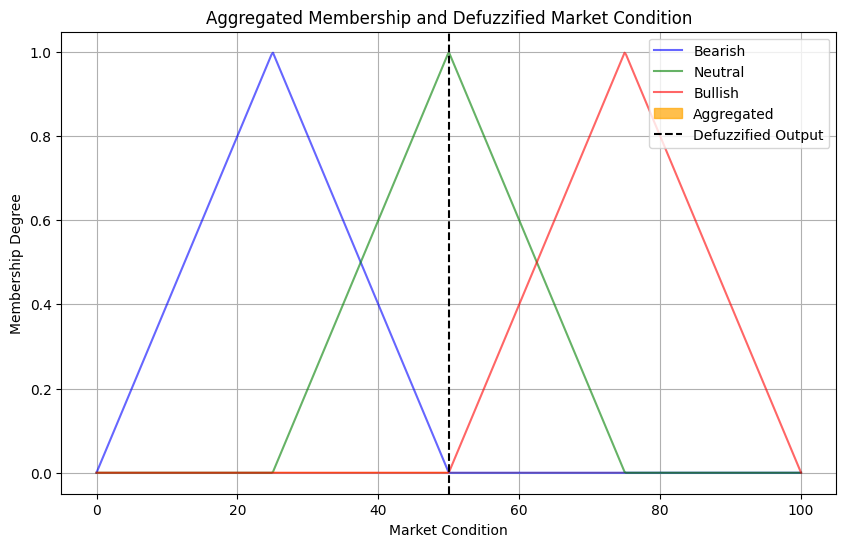

In [38]:

plt.figure(figsize=(10, 6))
plt.plot(market_condition, condition_bearish, label="Bearish", color="blue", alpha=0.6)
plt.plot(market_condition, condition_neutral, label="Neutral", color="green", alpha=0.6)
plt.plot(market_condition, condition_bullish, label="Bullish", color="red", alpha=0.6)
plt.fill_between(market_condition, 0, aggregated, color="orange", alpha=0.7, label="Aggregated")
plt.axvline(market_condition_output, color="black", linestyle="--", label="Defuzzified Output")
plt.title("Aggregated Membership and Defuzzified Market Condition")
plt.xlabel("Market Condition")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


# **Advanced Fuzzy Logic System**

## **Defining the Ranges**

In [ ]:
pip install scikit-fuzzy


In [ ]:
import pandas as pd

relevant_columns = ['High', 'Low', 'Volume']

quartiles = {}

for column in relevant_columns:
    q1 = data[column].quantile(0.25)  
    q2 = data[column].quantile(0.50)  
    q3 = data[column].quantile(0.75)  
    quartiles[column] = {"Q1": q1, "Median (Q2)": q2, "Q3": q3}

quartiles_df = pd.DataFrame(quartiles).T
quartiles_df.columns = ["Q1", "Median (Q2)", "Q3"]

print("Quartiles for Relevant Columns:")
print(quartiles_df)


In [ ]:
relevant_columns = ['High', 'Low', 'Volume']

min_max_values = data[relevant_columns].agg(['min', 'max']).T
min_max_values.columns = ["Min", "Max"]

# Display the results
print("Min and Max Values for Each Feature:")
print(min_max_values)


## **Fuzzy**

Sample High Price: 1777
Sample Low Price: 1500
Sample Volume: 900
High Price Levels: Low=0.97, Medium=0.00, High=0.00
Low Price Levels: Low=0.15, Medium=0.00, High=0.00
Volume Levels: Low=0.00, Moderate=0.00, High=0.65
Risk Levels: Low=0.00, Medium=1.00, High=0.00
Defuzzified Risk Level: 50.00


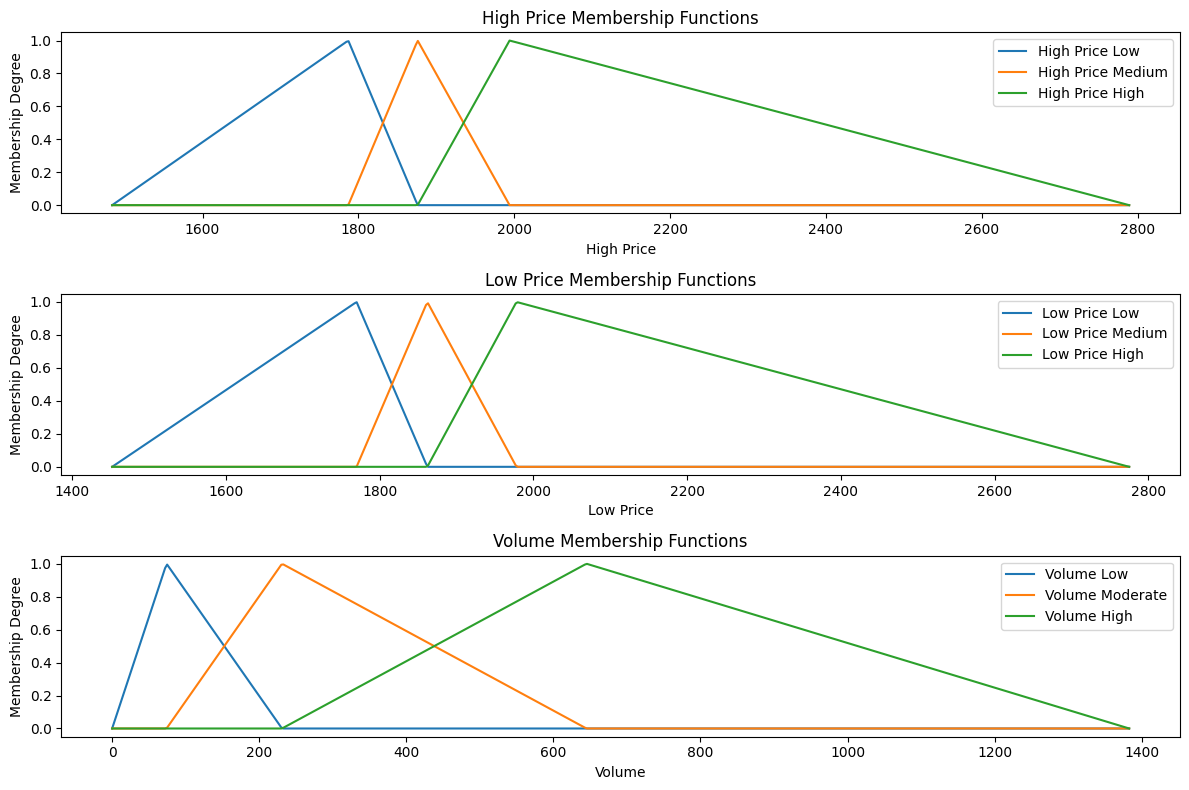

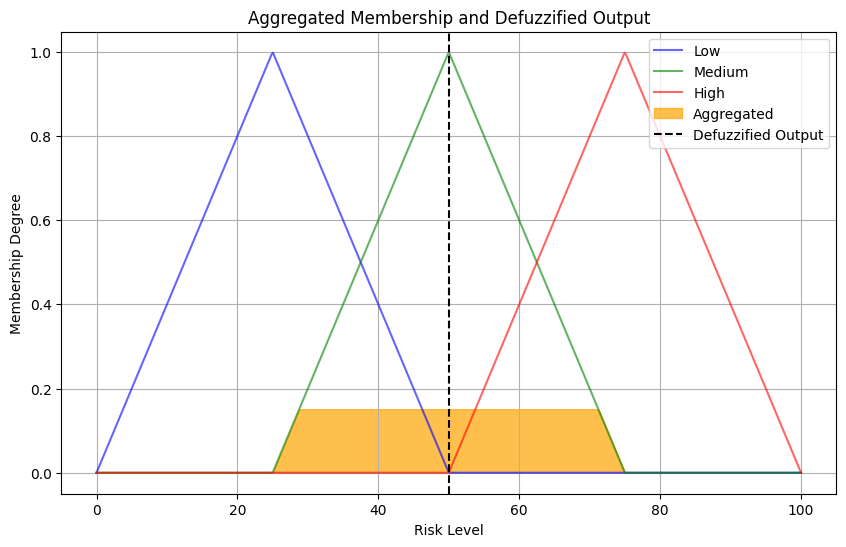

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse for inputs and output
high_price = np.linspace(1484, 2789, 500)
low_price = np.linspace(1452, 2775, 500)
volume = np.linspace(0, 1383, 500)
risk_level = np.linspace(0, 100, 500)

# High Price: Low, Medium, High
high_price_low = fuzz.trimf(high_price, [1484, 1787, 1876])
high_price_medium = fuzz.trimf(high_price, [1787, 1876, 1994])
high_price_high = fuzz.trimf(high_price, [1876, 1994, 2789])

# Low Price: Low, Medium, High
low_price_low = fuzz.trimf(low_price, [1452, 1770, 1862])
low_price_medium = fuzz.trimf(low_price, [1770, 1862, 1978])
low_price_high = fuzz.trimf(low_price, [1862, 1978, 2775])

# Volume: Low, Moderate, High
volume_low = fuzz.trimf(volume, [0, 74, 231])
volume_moderate = fuzz.trimf(volume, [74, 231, 645])
volume_high = fuzz.trimf(volume, [231, 645, 1383])

# Risk Level: Low, Medium, High
risk_low = fuzz.trimf(risk_level, [0, 25, 50])
risk_medium = fuzz.trimf(risk_level, [25, 50, 75])
risk_high = fuzz.trimf(risk_level, [50, 75, 100])

# Define sample input values
sample_high_price = 1777
sample_low_price = 1500
sample_volume = 900

# Calculate membership levels for the sample inputs
high_price_low_level = fuzz.interp_membership(high_price, high_price_low, sample_high_price)
high_price_medium_level = fuzz.interp_membership(high_price, high_price_medium, sample_high_price)
high_price_high_level = fuzz.interp_membership(high_price, high_price_high, sample_high_price)

low_price_low_level = fuzz.interp_membership(low_price, low_price_low, sample_low_price)
low_price_medium_level = fuzz.interp_membership(low_price, low_price_medium, sample_low_price)
low_price_high_level = fuzz.interp_membership(low_price, low_price_high, sample_low_price)

volume_low_level = fuzz.interp_membership(volume, volume_low, sample_volume)
volume_moderate_level = fuzz.interp_membership(volume, volume_moderate, sample_volume)
volume_high_level = fuzz.interp_membership(volume, volume_high, sample_volume)

# Display membership levels for inputs
print(f"Sample High Price: {sample_high_price}")
print(f"Sample Low Price: {sample_low_price}")
print(f"Sample Volume: {sample_volume}")
print(f"High Price Levels: Low={high_price_low_level:.2f}, Medium={high_price_medium_level:.2f}, High={high_price_high_level:.2f}")
print(f"Low Price Levels: Low={low_price_low_level:.2f}, Medium={low_price_medium_level:.2f}, High={low_price_high_level:.2f}")
print(f"Volume Levels: Low={volume_low_level:.2f}, Moderate={volume_moderate_level:.2f}, High={volume_high_level:.2f}")

# Assign risk levels for each rule
risk_rule1 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule2 = fuzz.trimf(risk_level, [0, 25, 50])  #  Low risk
risk_rule3 = fuzz.trimf(risk_level, [25, 50, 75])  #  Medium risk

risk_rule4 = fuzz.trimf(risk_level, [0, 25, 50])  #  Low risk
risk_rule5 = fuzz.trimf(risk_level, [25, 50, 75])  #  Medium risk
risk_rule6 = fuzz.trimf(risk_level, [50, 75, 100])  #  High risk

risk_rule7 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule8 = fuzz.trimf(risk_level, [25, 50, 75])  # Medium risk
risk_rule9 = fuzz.trimf(risk_level, [50, 75, 100])  #  High risk

risk_rule10 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule11 = fuzz.trimf(risk_level, [25, 50, 75])  #  Medium risk
risk_rule12 = fuzz.trimf(risk_level, [50, 75, 100])  #  High risk

risk_rule13 = fuzz.trimf(risk_level, [0, 25, 50])  #  Low risk
risk_rule14 = fuzz.trimf(risk_level, [25, 50, 75])  #  Medium risk
risk_rule15 = fuzz.trimf(risk_level, [50, 75, 100])  #  High risk

risk_rule16 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule17 = fuzz.trimf(risk_level, [25, 50, 75])  # Medium risk
risk_rule18 = fuzz.trimf(risk_level, [50, 75, 100])  # High risk

risk_rule19 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule20 = fuzz.trimf(risk_level, [25, 50, 75])  # Medium risk
risk_rule21 = fuzz.trimf(risk_level, [50, 75, 100])  #High risk

risk_rule22 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule23 = fuzz.trimf(risk_level, [25, 50, 75])  # Medium risk
risk_rule24 = fuzz.trimf(risk_level, [50, 75, 100])  #  High risk

risk_rule25 = fuzz.trimf(risk_level, [0, 25, 50])  # Low risk
risk_rule26 = fuzz.trimf(risk_level, [25, 50, 75])  #  Medium risk
risk_rule27 = fuzz.trimf(risk_level, [50, 75, 100])  # High risk

rule1 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_low_level), volume_low_level), risk_rule1)  # Low risk
rule2 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_low_level), volume_moderate_level), risk_rule2)  # Low risk
rule3 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_low_level), volume_high_level), risk_rule3)  # Medium risk

rule4 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_medium_level), volume_low_level), risk_rule4)  # Low risk
rule5 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_medium_level), volume_moderate_level), risk_rule5)  # Medium risk
rule6 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_medium_level), volume_high_level), risk_rule6)  # High risk

rule7 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_high_level), volume_low_level), risk_rule7)  # Low risk
rule8 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_high_level), volume_moderate_level), risk_rule8)  # Medium risk
rule9 = np.fmin(np.fmin(np.fmin(high_price_low_level, low_price_high_level), volume_high_level), risk_rule9)  # High risk

rule10 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_low_level), volume_low_level), risk_rule10)  # Low risk
rule11 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_low_level), volume_moderate_level), risk_rule11)  # Medium risk
rule12 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_low_level), volume_high_level), risk_rule12)  # High risk

rule13 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_medium_level), volume_low_level), risk_rule13)  # Low risk
rule14 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_medium_level), volume_moderate_level), risk_rule14)  # Medium risk
rule15 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_medium_level), volume_high_level), risk_rule15)  # High risk

rule16 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_high_level), volume_low_level), risk_rule16)  # Low risk
rule17 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_high_level), volume_moderate_level), risk_rule17)  # Medium risk
rule18 = np.fmin(np.fmin(np.fmin(high_price_medium_level, low_price_high_level), volume_high_level), risk_rule18)  # High risk

rule19 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_low_level), volume_low_level), risk_rule19)  # Low risk
rule20 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_low_level), volume_moderate_level), risk_rule20)  # Medium risk
rule21 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_low_level), volume_high_level), risk_rule21)  # High risk

rule22 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_medium_level), volume_low_level), risk_rule22)  # Low risk
rule23 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_medium_level), volume_moderate_level), risk_rule23)  # Medium risk
rule24 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_medium_level), volume_high_level), risk_rule24)  # High risk

rule25 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_high_level), volume_low_level), risk_rule25)  # Low risk
rule26 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_high_level), volume_moderate_level), risk_rule26)  # Medium risk
rule27 = np.fmin(np.fmin(np.fmin(high_price_high_level, low_price_high_level), volume_high_level), risk_rule27)  # High risk

aggregated = np.fmax.reduce([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
    rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27
])




risk_output = fuzz.defuzz(risk_level, aggregated, 'centroid')
activation = fuzz.interp_membership(risk_level, aggregated, risk_output)

risk_low_level = fuzz.interp_membership(risk_level, risk_low, risk_output)
risk_medium_level = fuzz.interp_membership(risk_level, risk_medium, risk_output)
risk_high_level = fuzz.interp_membership(risk_level, risk_high, risk_output)

# Display membership levels for risk
print(f"Risk Levels: Low={risk_low_level:.2f}, Medium={risk_medium_level:.2f}, High={risk_high_level:.2f}")
print(f"Defuzzified Risk Level: {risk_output:.2f}")

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(high_price, high_price_low, label="High Price Low")
plt.plot(high_price, high_price_medium, label="High Price Medium")
plt.plot(high_price, high_price_high, label="High Price High")
plt.title("High Price Membership Functions")
plt.xlabel("High Price")
plt.ylabel("Membership Degree")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(low_price, low_price_low, label="Low Price Low")
plt.plot(low_price, low_price_medium, label="Low Price Medium")
plt.plot(low_price, low_price_high, label="Low Price High")
plt.title("Low Price Membership Functions")
plt.xlabel("Low Price")
plt.ylabel("Membership Degree")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(volume, volume_low, label="Volume Low")
plt.plot(volume, volume_moderate, label="Volume Moderate")
plt.plot(volume, volume_high, label="Volume High")
plt.title("Volume Membership Functions")
plt.xlabel("Volume")
plt.ylabel("Membership Degree")
plt.legend()
plt.tight_layout()
plt.show()

# Visualize the aggregated output
plt.figure(figsize=(10, 6))
plt.plot(risk_level, risk_low, label="Low", color="blue", alpha=0.6)
plt.plot(risk_level, risk_medium, label="Medium", color="green", alpha=0.6)
plt.plot(risk_level, risk_high, label="High", color="red", alpha=0.6)
plt.fill_between(risk_level, 0, aggregated, color="orange", alpha=0.7, label="Aggregated")
plt.axvline(risk_output, color="black", linestyle="--", label="Defuzzified Output")
plt.title("Aggregated Membership and Defuzzified Output")
plt.xlabel("Risk Level")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()
